## TITLE: Inundation Vs Breacharea

**Purpose:** 

**Dependencies:** 

---


In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [9]:
w = pd.read_csv('../data/width_wet_cells_percent_island.csv')
d = pd.read_csv('../data/depth_wet_cells_percent_island.csv')
wd = pd.read_csv('../data/width_depth_wet_cells_percent_island.csv')
loc = pd.read_csv('../data/rall_wet_cells_percent_island.csv')
west = pd.read_csv('../data/west_wet_cells_percent_island.csv')
east = pd.read_csv('../data/east_wet_cells_percent_island.csv')

In [21]:
wd[wd['Unnamed: 0'] == 'dw_0008_1']

,Unnamed: 0,wet_cell_count,diff_topo,diff_no_breach,percent_island,num_breaches,mean_depth,mean_distance,mean_breach_area,total_breach_area,inundation_per_breach (m**2)
86,dw_0008_1,812264.0,104069.0,3853.0,0.332981,1.0,-0.267561,331.982517,88.825648,88.825648,1248372.0


In [15]:
df = pd.concat([w, d,wd, loc, east, west], axis=0)
wet_inundation = df[['diff_no_breach', 'total_breach_area', 'Unnamed: 0', 'num_breaches', 'mean_distance', 'percent_island']]
wet_inundation['diff_no_breach'] *= 18**2

/tmp/ipykernel_25910/735796138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wet_inundation['diff_no_breach'] *= 18**2


In [17]:
wet_inundation['percent_island'] *= 100

/tmp/ipykernel_25910/658087568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wet_inundation['percent_island'] *= 100


/tmp/ipykernel_25910/3362206745.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wet_inundation['breach_category'] = pd.cut(wet_inundation['num_breaches'], bins=bins, labels=labels, right=False)
/tmp/ipykernel_25910/3362206745.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = wet_inundation.groupby('breach_category')


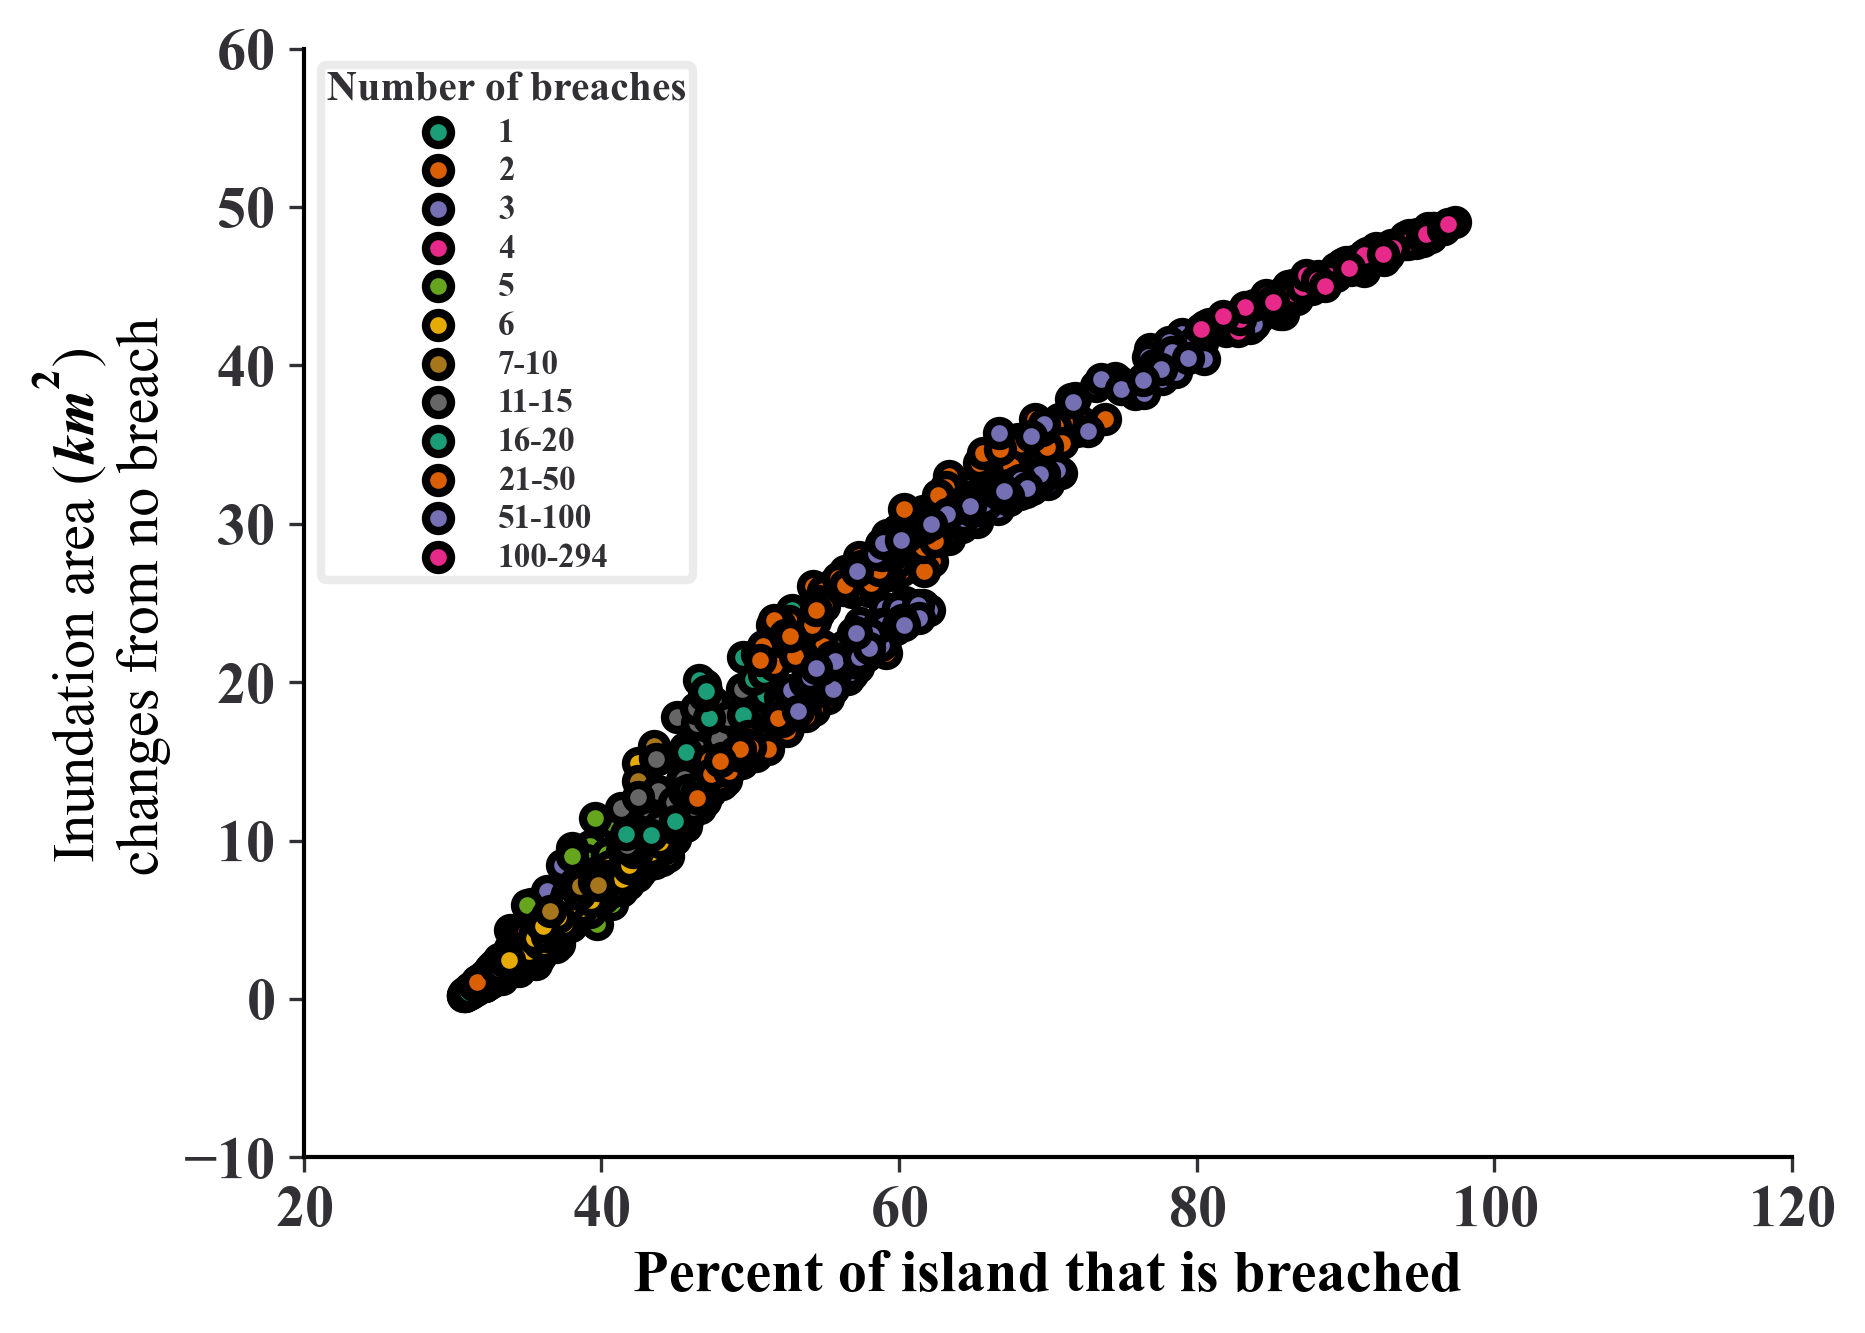

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('./mystyle.mplstyle')
# plt.rcParams.update({
#     "font.family": "serif",  # use serif/main font for text elements
#     "text.usetex": True,     # use inline math for ticks
#     "pgf.rcfonts": False     # don't setup fonts from rc parameters
#     })
# mpl.use('agg')
max_b = int(wet_inundation['num_breaches'].max())
min_b = int(wet_inundation['num_breaches'].min())
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)
bins = [1,2,3,4,5,6,7, 10, 15, 20, 50, 100, max_b]
labels=['1', '2', '3', '4', '5', '6', '7-10', '11-15', '16-20', '21-50', '51-100', f'100-{max_b}']
wet_inundation['breach_category'] = pd.cut(wet_inundation['num_breaches'], bins=bins, labels=labels, right=False)
grouped_data = wet_inundation.groupby('breach_category')
for label, group in grouped_data:
        plt.scatter(group['percent_island'], group['diff_no_breach']/1000**2, label=f'{label}')
        
plt.rcParams["font.weight"] = "bold"
plt.xlabel('Percent of island that is breached',fontweight='bold')
plt.ylabel('Inundation area ($km^2$) \n changes from no breach')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Number of breaches')
ax = plt.gca()
# ax.set_yscale('log')
# ax.set_xscale('log')

plt.gca()
plt.show()
# Formalize this plot with pygmt or tex
# plt.savefig('total_inundation_vs_area_log.png')